In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### Creating vectors and matrices.

We will use NumPy at the start. Vector is just a 1-dim array (or more precisely, 1-dim tensor). A matrix is a two dimensional array/tensor:

In [2]:
v1 = np.array([2,4,-1])
M1=np.array([[1,2,3],[2,3,4]])

In [3]:
v1

array([ 2,  4, -1])

In [4]:
M1

array([[1, 2, 3],
       [2, 3, 4]])

### Operations.

We can add tensors of the same size (by additng corresponding terms) and we can scale tensors (by multiplying each term by given scalar):

In [5]:
v2=np.array([3,-1,0])
M2=np.array([[2,3,3],[5,-2,4]])

In [6]:
v1+v2

array([ 5,  3, -1])

In [7]:
M1+M2

array([[3, 5, 6],
       [7, 1, 8]])

In [8]:
4*v1

array([ 8, 16, -4])

In [9]:
-3*M1

array([[ -3,  -6,  -9],
       [ -6,  -9, -12]])

Multiplication is not as nice and we have few types of multiplication depending on type of a tensor.

An important product on vectors is dot product ( a.k.a. inner product):
$$ \begin{bmatrix} w_1 \\ w_2 \\w_3 \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\x_3 \end{bmatrix} = w_1 x_1+ w_2 x_2+w_3x_3$$

A good way to think about it is to think of one vector as weights and the other as values, then the dot product is like a weighted sum. To perform a dot product we cat use "@" operation:


In [10]:
v1@v2

np.int64(2)

Another way is to use `np.dot` command:

In [11]:
np.dot(v1,v2)

np.int64(2)

We can also multiply matricies by performing a dot product of every row of the first matrix by every column of the second one. (Note: this means the the product is not commutative):
$$ \begin{bmatrix} 2 & 3 & 4 \\ 5 & 6 & 7 \end{bmatrix} \begin{bmatrix} a & b \\ c & d \\ e & f \end{bmatrix} = \begin{bmatrix} 2a+3c+4e & 2b+3d+4f \\ 5a+6c+7e & 5b+6d+7f \end{bmatrix}$$

This also means that number of columns of the first matrix must match to number of rows of the second one. To perform this product we can use the same "@" operator:

In [14]:
M3=np.array([[2,3],[3,5], [-2,4]])

In [15]:
M1@M3

array([[ 2, 25],
       [ 5, 37]])

### Other tools

Since we can think of vectors as matricies with one column, the dot product is just a matrix product of a transpose of the first vector by the second one. (Transpose is when we swap rows and columns of the matrix.)

In [16]:
M1.T

array([[1, 2],
       [2, 3],
       [3, 4]])

An important value for a vector is a norm. It is the lenght of a vector.
$$ ||{\bf v}||=\sqrt{{\bf v} \cdot {\bf v}}$$

In [17]:
np.linalg.norm(v1)

np.float64(4.58257569495584)

A unit vector is a vector of lenght one. To normalize a vector means to rescale it so that it is a unit vector. In other words, get a vector of lenght 1 that points in the same direction as your vector. To normalize a vector all we need to do is divide it by its norm:

In [18]:
u1=v1/np.linalg.norm(v1)
u1

array([ 0.43643578,  0.87287156, -0.21821789])

In [20]:
np.linalg.norm(u1)

np.float64(1.0)

Let's see this graphically:

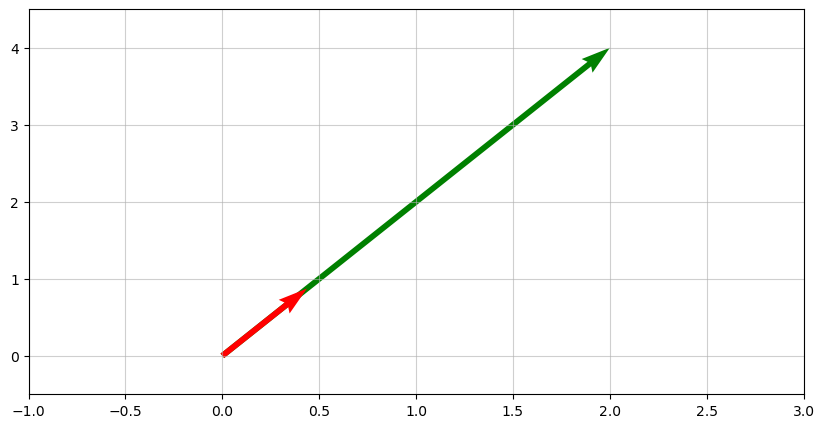

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim([-1, 3])
ax.set_ylim([-0.5, 4.5])
plt.quiver([0,0], [0,0],[v1[0], u1[0]], [v1[1], u1[1]], angles='xy',scale_units='xy',color = ['g','r'], scale=1)
plt.grid(alpha=0.6)


### Projections

A dot product can be also thought of as projection. To understand it, lets look at our vectors ${\bf v1}$ (in red) and ${\bf v2}$ (in green).

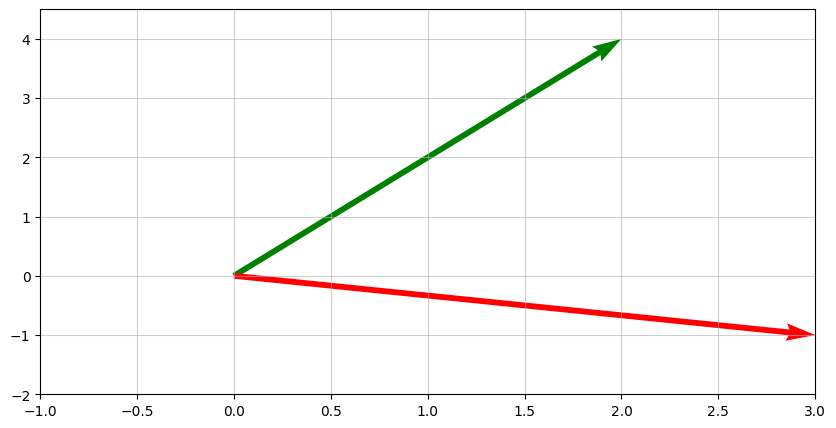

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim([-1, 3])
ax.set_ylim([-2, 4.5])
plt.quiver([0,0], [0,0],[v1[0], v2[0]], [v1[1], v2[1]], angles='xy',scale_units='xy',color = ['g','r'], scale=1)
plt.grid(alpha=0.6)

I want to project green vector onto a red one. This like a "shadow" of it on the red vector if the light source is right above the green vector. Manually this is like a finding an intersections of the red vector and the line that goes through the tip of the green vector and is perpendicular to the red one. The dot product is exactly the length of that "shadow". So, to find the projection I need to rescale the red vector so that its length equal to the dot product. We can do this by dividing the red vector by its norm to get length 1, and then multiplying by the dot product:

In [22]:
dot_res=v1@v2

p=v2*(dot_res/np.linalg.norm(v2))

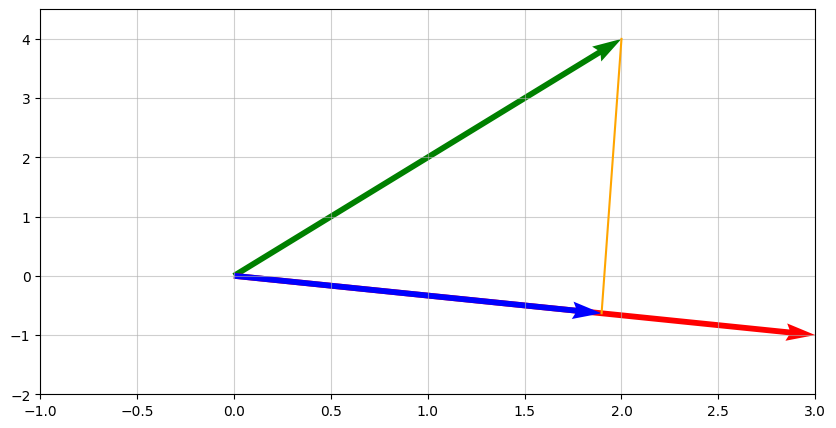

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim([-1, 3])
ax.set_ylim([-2, 4.5])
plt.quiver([0,0,0], [0,0,0],[v1[0], v2[0], p[0]], [v1[1], v2[1],p[1]], angles='xy',scale_units='xy',color = ['g','r','b'], scale=1)
plt.plot([ v1[0], p[0]], [ v1[1],p[1]], c='orange')
plt.grid(alpha=0.6)

### Using PyTorch:

PyTorch is a nice library that we will use in future when we want to talk about Neural Networks. If we want to use it, we need to define tensors using PyTorch commands. Note it is better to add `dtype=torch.float32` to signify that the entries are real numbers. Certain commands won't work otherwise.

In [24]:
v1 = torch.tensor([2,4,-1],dtype=torch.float32)
M1=torch.tensor([[1,2,3],[2,3,4]],dtype=torch.float32)
v2=torch.tensor([3,-1,0],dtype=torch.float32)
M2=torch.tensor([[2,3],[3,5], [-2,4]],dtype=torch.float32)

In [25]:
M1

tensor([[1., 2., 3.],
        [2., 3., 4.]])

In [26]:
v1@v2

tensor(2.)

In [27]:
M1@M2

tensor([[ 2., 25.],
        [ 5., 37.]])

It is worth noting that PyTorch has a built-in method to perform multiplication that is much faster:

In [28]:
torch.matmul(v1, v2)

tensor(2.)

In [29]:
torch.matmul(M1, M2)

tensor([[ 2., 25.],
        [ 5., 37.]])

In [30]:
M1.T

tensor([[1., 2.],
        [2., 3.],
        [3., 4.]])